In [4]:
import numpy as np
import cmath
import math
from scipy.io import wavfile
import matplotlib.pyplot as plt
from IPython.display import clear_output
from IPython.display import Audio
import time

In [5]:
def FFT(stuff, sampling_rate):
    c = []
    F = list(np.fft.fft(stuff))[:round(len(stuff)/2)]
    sampling_resolution = sampling_rate/len(stuff)
    for i in range(len(F)):
        r = 2*abs(F[i])/(len(stuff))

        c.append([r, i*sampling_resolution])
    return c    

<ipython-input-6-c71f9f844538>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read('./tst.wav')


ValueError: Invalid number of FFT data points (0) specified.

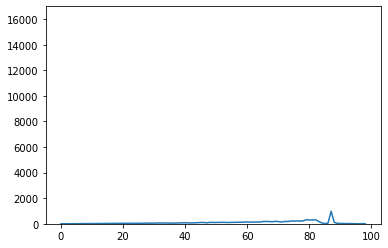

In [6]:
fs, data = wavfile.read('./tst.wav')
a = data
N = len(data)

k = max(data)
fps = 15
for packet_num in range(math.ceil((N*fps)/(fs))):
    plt.clf()
    packet = a[round((packet_num)*(fs/fps)):round((packet_num + 1)*(fs/fps))]
    wave_info = FFT(packet, fs)[:round((fs/2)/(fps))]
    unz = list(zip(*wave_info))
    intensities = unz[0]
    frequencies = unz[1]
    bin_data = []
    for bin_ind in range(1, 100):
        upper_lim = ((fs/2))*((bin_ind/100)**2)
        lower_lim = ((fs/2))*(((bin_ind - 1)/100)**2)
        new_data = (intensities[math.floor(upper_lim//(frequencies[1] - frequencies[0]))]/fps)*(upper_lim - lower_lim)
        bin_data.append(new_data)
    plt.plot(bin_data)
    axes = plt.gca()
    axes.set_ylim([0, k])
    plt.savefig(str(2 * packet_num) + ".png")
    
    
    packet1 = a[round((packet_num + 1)*(fs/fps)):round((packet_num + 2)*(fs/fps))]
    wave_info1 = FFT(packet1, fs)[:round((fs/2)/(fps))]
    unz1 = list(zip(*wave_info1))
    intensities1 = unz1[0]
    frequencies1 = unz1[1]
    bin_data1 = []
    for bin_ind1 in range(1, 100):
        upper_lim1 = ((fs/2))*((bin_ind1/100)**2)
        lower_lim1 = ((fs/2))*(((bin_ind1 - 1)/100)**2)
        new_data1 = (intensities1[math.floor(upper_lim1//(frequencies1[1] - frequencies1[0]))]/fps)*(upper_lim1 - lower_lim1)
        bin_data1.append(new_data1)
        
    smooth_bin = []
    for smoothened_bin_ind in range(99):
        smooth_bin.append((bin_data[smoothened_bin_ind] + bin_data1[smoothened_bin_ind])/2)
        
    plt.clf()
    plt.plot(smooth_bin)
    axes = plt.gca()
    axes.set_ylim([0, k])
    plt.savefig(str(2 * packet_num + 1) + ".png")
    
    
    plt.clf()
    plt.plot(bin_data1)
    axes = plt.gca()
    axes.set_ylim([0, k])
    plt.savefig(str(2 * packet_num + 2) + ".png")
#     clear_output(wait=True)
!ffmpeg -r 30 -f image2 -s 432x288 -i %d.png -i tst.mp3 -vcodec libx264 -crf 25  -pix_fmt yuv420p -acodec copy tst.mp4
!rm *.png
#     TODO: Write pygame code to show bars